<a href="https://colab.research.google.com/github/FathimaNazarudeen/project/blob/main/DDoS/project_ddos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DrDoS_DNS_data_1_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_DNS.csv',nrows=6000)
DrDoS_LDAP_data_2_0_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_LDAP.csv',nrows=6000)
DrDoS_MSSQL_data_1_3_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_MSSQL.csv',nrows=6000)
DrDoS_NetBIOS_data_1_3_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_NetBIOS.csv',nrows=6000)
DrDoS_NTP_data_data_5_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_NTP.csv',nrows=6000)
DrDoS_SNMP_data_1_3_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_SNMP.csv',nrows=6000)
DrDoS_SSDP_data_2_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_SSDP.csv',nrows=6000)
DrDoS_UDP_data_2_per = pd.read_csv('/content/drive/MyDrive/01-12/DrDoS_UDP.csv',nrows=6000)
Syn_data_4_per = pd.read_csv('/content/drive/MyDrive/01-12/Syn.csv',nrows=6000)
UDPLag_data_2_0_per = pd.read_csv('/content/drive/MyDrive/01-12/UDPLag.csv',nrows=6000)

In [4]:
data = pd.concat([DrDoS_DNS_data_1_per, DrDoS_LDAP_data_2_0_per, DrDoS_MSSQL_data_1_3_per, DrDoS_NetBIOS_data_1_3_per, DrDoS_NTP_data_data_5_per, DrDoS_SNMP_data_1_3_per, DrDoS_SSDP_data_2_per, DrDoS_UDP_data_2_per, Syn_data_4_per, UDPLag_data_2_0_per], ignore_index = True)

In [5]:
data[' Label'].value_counts()

DrDoS_MSSQL      6000
DrDoS_UDP        6000
UDP-lag          6000
DrDoS_LDAP       5999
Syn              5998
DrDoS_SNMP       5997
DrDoS_NetBIOS    5991
DrDoS_SSDP       5970
BENIGN           5682
DrDoS_DNS        5377
DrDoS_NTP         986
Name:  Label, dtype: int64

In [6]:
data.columns 

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [7]:
data_real = data.replace(np.inf, np.nan)

In [8]:
data_real.isnull().sum().sum()

2044

In [9]:
data_df = data_real.dropna(axis=0)

In [10]:
data_df.isnull().sum().sum()

0

In [11]:
data_df

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,40871,172.16.0.5-192.168.50.1-38625-63051-17,172.16.0.5,38625,192.168.50.1,63051,17,2018-12-01 13:04:46.628249,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
59996,32916,172.16.0.5-192.168.50.1-58632-18963-17,172.16.0.5,58632,192.168.50.1,18963,17,2018-12-01 13:04:46.628963,212238,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
59997,2435,172.16.0.5-192.168.50.1-46104-64704-17,172.16.0.5,46104,192.168.50.1,64704,17,2018-12-01 13:04:46.629014,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
59998,184217,172.16.0.5-192.168.50.1-60686-10440-17,172.16.0.5,60686,192.168.50.1,10440,17,2018-12-01 13:04:46.629016,108952,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag


In [12]:
data_X = data_df.drop([' Label', 'SimillarHTTP'], axis = 1)

In [13]:
data_X.columns 

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [14]:
data_X.shape 

(58978, 86)

In [15]:
data_y = data_df[' Label']

In [16]:
data_y.shape 

(58978,)

In [17]:
data_df.isnull().sum().sum()

0

In [18]:
data_y.unique()

array(['DrDoS_DNS', 'BENIGN', 'DrDoS_LDAP', 'DrDoS_MSSQL',
       'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
       'DrDoS_UDP', 'Syn', 'UDP-lag'], dtype=object)

In [19]:
data_X 

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,40871,172.16.0.5-192.168.50.1-38625-63051-17,172.16.0.5,38625,192.168.50.1,63051,17,2018-12-01 13:04:46.628249,1,2,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
59996,32916,172.16.0.5-192.168.50.1-58632-18963-17,172.16.0.5,58632,192.168.50.1,18963,17,2018-12-01 13:04:46.628963,212238,6,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
59997,2435,172.16.0.5-192.168.50.1-46104-64704-17,172.16.0.5,46104,192.168.50.1,64704,17,2018-12-01 13:04:46.629014,1,2,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
59998,184217,172.16.0.5-192.168.50.1-60686-10440-17,172.16.0.5,60686,192.168.50.1,10440,17,2018-12-01 13:04:46.629016,108952,4,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Label encoding

In [20]:
from sklearn.preprocessing import LabelEncoder 

In [21]:
le = LabelEncoder()

In [22]:
data_y_trans = le.fit_transform(data_y)
le_fid = LabelEncoder()


In [23]:
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])

In [24]:
le_SIP = LabelEncoder()

In [25]:
le_SIP.fit(data_X[' Source IP'])
data_X[' Source IP'] = le_SIP.fit_transform(data_X[' Source IP'])

In [26]:
le_DIP = LabelEncoder()


In [27]:
le_DIP.fit(data_X[' Destination IP'])
data_X[' Destination IP'] = le_DIP.fit_transform(data_X[' Destination IP'])

In [28]:
le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])

In [29]:
data_X

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,425,31342,16,634,90,60495,17,5984,28415,97,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,430,22944,75,634,23,60495,17,5985,2,2,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1654,30339,16,634,90,46391,17,5986,48549,200,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2927,28045,16,634,90,11894,17,5987,48337,200,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,694,29116,16,634,90,27878,17,5988,32026,200,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,40871,8767,16,38625,90,63051,17,53487,1,2,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
59996,32916,21439,16,58632,90,18963,17,53488,212238,6,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
59997,2435,12555,16,46104,90,64704,17,53489,1,2,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
59998,184217,23227,16,60686,90,10440,17,53490,108952,4,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [30]:
df2 = pd.DataFrame(data_X)  

In [31]:
df2.to_csv(r'my_data.csv', index=False)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.2)

In [33]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
ml = DecisionTreeClassifier()

In [35]:
ml.fit(X_train_std,y_train)

DecisionTreeClassifier()

In [36]:
res=ml.predict(X_test_std)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_1=accuracy_score(y_test,res)
print("Decision tree :",accuracy_1*100)

Decision tree : 98.92336385215327


In [39]:
ress=ml.predict(X_train_std)
acc11=accuracy_score(y_train,ress)
print("Decision tree :",acc11*100)

Decision tree : 100.0


In [40]:
import matplotlib.pyplot as plt
acc=[]
for i in range(1,50):
  ml = DecisionTreeClassifier(max_depth=i)
  ml.fit(X_train_std,y_train)
  res=ml.predict(X_test_std)
  acc.append(accuracy_score(y_test,res))
  if accuracy_score(y_test,res)==100:
    break



In [41]:
print(acc)

[0.19955917260088166, 0.3947100712105799, 0.5899457443201085, 0.6872668701254663, 0.7882332994235334, 0.8819091217361817, 0.9726178365547643, 0.9891488640217023, 0.9883858935232283, 0.9890640895218719, 0.9890640895218719, 0.9891488640217023, 0.9893184130213631, 0.9410817226178365, 0.9893184130213631, 0.9892336385215327, 0.9890640895218719, 0.9892336385215327, 0.9892336385215327, 0.9893184130213631, 0.9892336385215327, 0.9410817226178365, 0.9892336385215327, 0.9883858935232283, 0.9892336385215327, 0.9892336385215327, 0.9891488640217023, 0.9892336385215327, 0.9892336385215327, 0.9412512716174974, 0.9892336385215327, 0.9890640895218719, 0.9890640895218719, 0.9891488640217023, 0.9412512716174974, 0.940996948118006, 0.9889793150220414, 0.9892336385215327, 0.9890640895218719, 0.9892336385215327, 0.9891488640217023, 0.9892336385215327, 0.9892336385215327, 0.9890640895218719, 0.9890640895218719, 0.9890640895218719, 0.9893184130213631, 0.9892336385215327, 0.9893184130213631]


In [42]:
print(i)

49


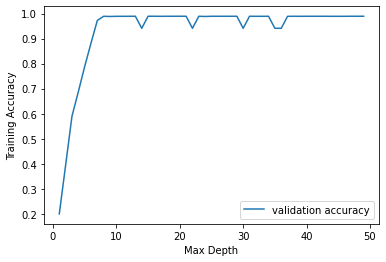

In [43]:
y=[k for k in range(1,i+1)]
plt.plot(y,acc, label='validation accuracy') 
plt.xlabel('Max Depth') # Label x-axis
plt.ylabel('Training Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_train_std, y_train)

RandomForestClassifier()

In [45]:
rf_y_pred1 = rf1.predict(X_test_std)

In [46]:
acc_score1 = accuracy_score(y_test, rf_y_pred1)
print("Accuracy Score for Random_Forest: \n", acc_score1*100)

Accuracy Score for Random_Forest: 
 99.70328925059341


In [47]:
ress_rf=ml.predict(X_train_std)
acc_rf=accuracy_score(y_train,ress_rf)
print("Accuracy Score for Random_Forest:",acc_rf*100)

Accuracy Score for Random_Forest: 100.0


In [48]:
import matplotlib.pyplot as plt
acc=[]
for i in range(1,50):
  rf1 = RandomForestClassifier(max_depth=i, random_state=0)
  rf1.fit(X_train_std, y_train)
  rf_y_pred1 = rf1.predict(X_test_std)
  acc_score1 = accuracy_score(y_test, rf_y_pred1)
  acc.append(acc_score1)
  if accuracy_score(y_test,res)==100:
    break

In [49]:
i

49

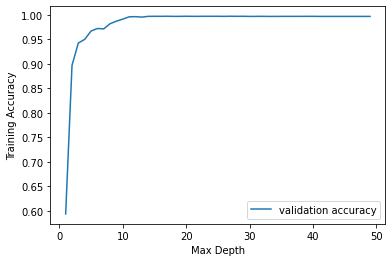

In [50]:
y=[k for k in range(1,i+1)]
plt.plot(y,acc, label='validation accuracy') 
plt.xlabel('Max Depth') # Label x-axis
plt.ylabel('Training Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

XG boost

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gradient_boost1 = GradientBoostingClassifier()
gradient_boost1.fit(X_train_std, y_train)

GradientBoostingClassifier()

In [53]:
res_xg1=gradient_boost1.predict(X_test_std)

In [54]:
acc_score_xg1 = accuracy_score(y_test, res_xg1)
print("Accuracy Score for GradientBoosting: \n", acc_score_xg1*100)

Accuracy Score for GradientBoosting: 
 98.67751780264497


In [55]:
ress_xg=ml.predict(X_train_std)
acc_xg=accuracy_score(y_train,ress_xg)
print("Accuracy Score for GradientBoosting:",acc_xg*100)

Accuracy Score for GradientBoosting: 100.0


In [56]:
acc=[]
for i in range(1,5):
  gradient_boost1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
max_depth=i, random_state=0)
  gradient_boost1.fit(X_train_std, y_train)
  res_xg1=gradient_boost1.predict(X_test_std)
  acc.append(accuracy_score(y_test, res_xg1))
  if accuracy_score(y_test,res)==100:
    break


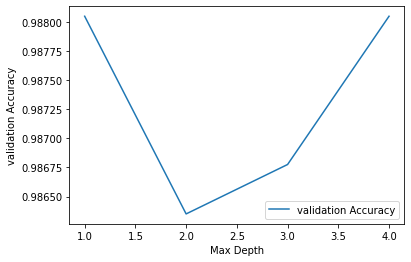

In [60]:
y=[k for k in range(1,i+1)]
plt.plot(y,acc, label='validation Accuracy') 
plt.xlabel('Max Depth') # Label x-axis
plt.ylabel('validation Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest 
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, 
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

model.fit(data_X, data_y_trans)

In [ ]:
model.feature_importances_

In [ ]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [ ]:
data_new_20features_X = data_X[[' Timestamp', ' Source Port', ' Min Packet Length', ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', ' Flow Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Destination Port', ' act_data_pkt_fwd']]

In [ ]:
data_new_20features_X

In [ ]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=None, random_state=0)
rf.fit(X_train_std_20, y_train_20)

In [ ]:
rf_y_pred = rf.predict(X_test_std_20)

In [ ]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [ ]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(rf_y_pred)))

In [ ]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradient_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
max_depth=3, random_state=0)
gradient_boost.fit(X_train_std_20, y_train_20)

In [ ]:
res_xg=gradient_boost.predict(X_test_std_20)

In [ ]:
acc_score_xg = accuracy_score(y_test_20, res_xg)
print("Accuracy Score for GradientBoosting: \n", acc_score_xg*100)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ml_dec = DecisionTreeClassifier(random_state=0)

In [ ]:
ml_dec.fit(X_train_std_20, y_train_20)

In [ ]:
res_dec=ml_dec.predict(X_test_std_20)

In [ ]:
accuracy_1=accuracy_score(y_test_20,res_dec)
print("Decision tree :",accuracy_1*100)